Model Performance Comparison:
            Model         MSE        MAE        R²
0   Random Forest  227.381495  10.895641  0.972671
1  Neural Network  291.739206  12.109566  0.964936


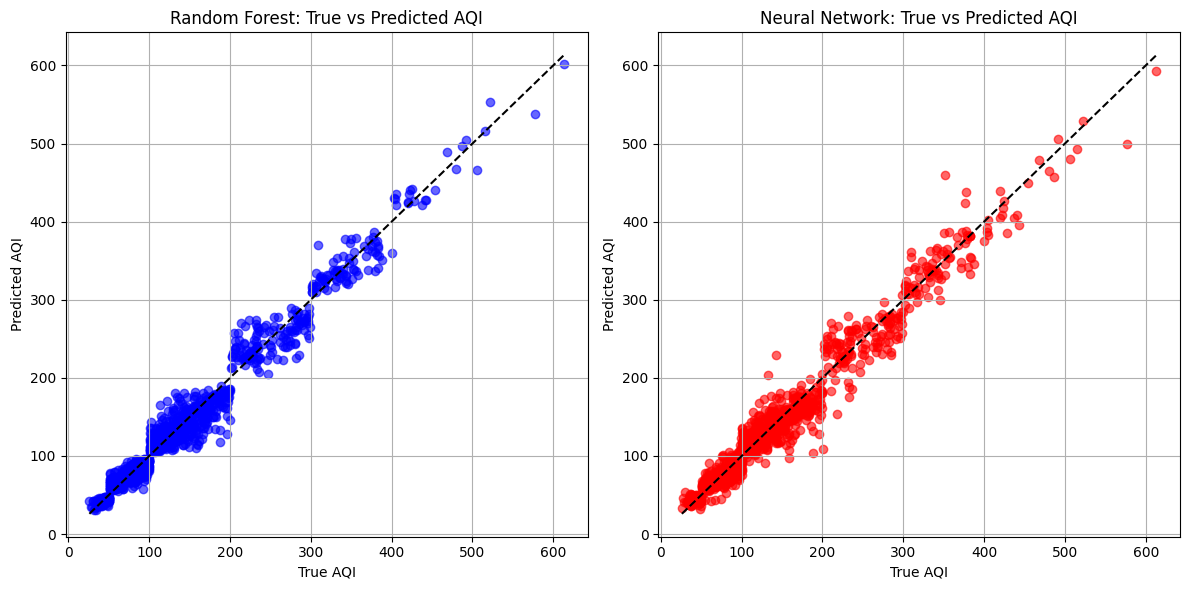

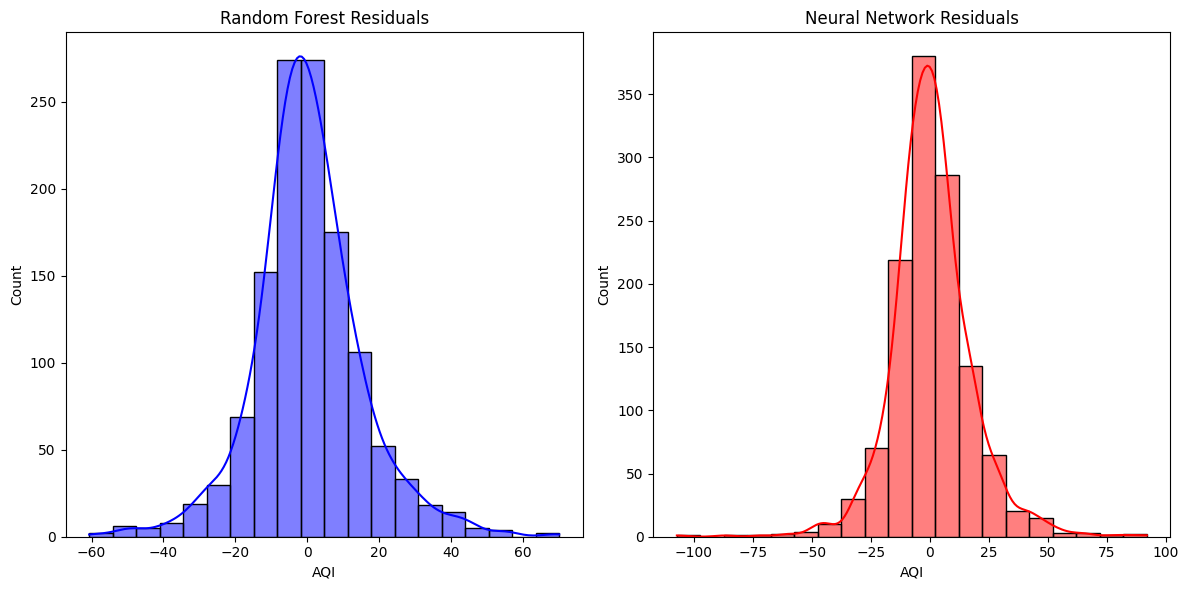

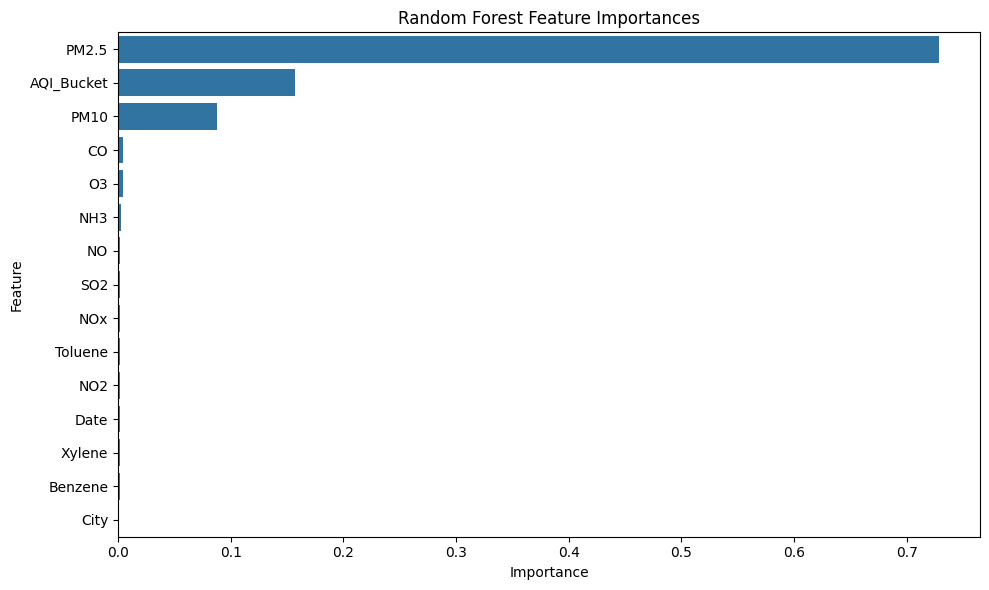

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv(r'D:\\Codes\\Projects\\ML\\air_quality_model\\data\\raw\\raw.csv')

# Drop rows with NaN values in 'AQI' column
df = df.dropna(subset=['AQI'])

# Replace inf/-inf with NaN, then drop all rows with NaN (any column)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# Define features and target
X = df.drop(columns=['AQI'])
y = df['AQI']

# Label encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Scale features for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluate models
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network'],
    'MSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, nn_predictions)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, nn_predictions)
    ],
    'R²': [
        r2_score(y_test, y_pred),
        r2_score(y_test, nn_predictions)
    ]
})

print("Model Performance Comparison:")
print(metrics_df)

# Visualize true vs predicted
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Random Forest: True vs Predicted AQI')
plt.xlabel('True AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_predictions, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Neural Network: True vs Predicted AQI')
plt.xlabel('True AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred, bins=20, kde=True, color='blue')
plt.title("Random Forest Residuals")

plt.subplot(1, 2, 2)
sns.histplot(y_test - nn_predictions, bins=20, kde=True, color='red')
plt.title("Neural Network Residuals")

plt.tight_layout()
plt.show()

# Plot feature importance
if hasattr(rf_model, 'feature_importances_'):
    fi = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=fi)
    plt.title('Random Forest Feature Importances')
    plt.tight_layout()
    plt.show()


In [2]:
# notebooks/04_Visualizations.ipynb

# Import the prediction function
from src.predict import make_predictions
from datetime import datetime

# Example input data (after preprocessing)
input_data = [
    {"city": "Delhi", "temperature": 30.5, "humidity": 50, "wind_speed": 6},
    {"city": "Mumbai", "temperature": 29.3, "humidity": 60, "wind_speed": 7},
    {"city": "Bangalore", "temperature": 24.8, "humidity": 70, "wind_speed": 5},
    {"city": "Chennai", "temperature": 32.1, "humidity": 55, "wind_speed": 4}
]

# Get predictions from both models
nn_preds, rf_preds = make_predictions(input_data)

# Get the current time (for contextual explanation)
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Display predictions with contextual information (city and time)
for i, data in enumerate(input_data):
    print(f"Prediction for {data['city']} at {current_time}:")
    print(f" - Neural Network Prediction: {nn_preds[i]}")
    print(f" - Random Forest Prediction: {rf_preds[i]}")
    print("-" * 50)


ImportError: Traceback (most recent call last):
  File "C:\Users\Boopathi Kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.